In [1]:
#  https://scikit-learn.org/stable/modules/model_evaluation.html
#import iris as iris
import graphviz
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nm
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'
HTML(style)

In [4]:
vibration = pd.read_csv('../data/Vodnik_VIBR.csv', index_col=0, sep=';')

In [5]:
vibration.head()

,Значение,Состояние значения
data_time,,
14.04.2022 17:42,"7,274764787",норма
14.04.2022 17:42,"7,274764787",норма
14.04.2022 17:43,"7,27590385",норма
14.04.2022 17:43,"7,27590385",норма
14.04.2022 17:43,"7,27590385",норма


In [6]:
frequency = pd.read_csv('../data/Vodnik_frequency.csv', index_col=0, sep=';')

In [7]:
# Переименовать столбец
frequency = frequency.rename(columns= {'Значение': 'values_frequency', 'Состояние значения': 'values_state_frequency'})
frequency.head(100)
frequency.shape

(45090, 2)

In [8]:
# Переименовать столбец
vibration = vibration.rename(columns= {'Значение': 'values_vibration', 'Состояние значения': 'values_state_vibration'})
vibration.head(100)
vibration.shape

(47787, 2)

In [9]:
data = pd.merge(frequency, vibration, on=["data_time"],how="outer", validate="many_to_many").drop_duplicates()
data.shape

(45202, 4)

In [10]:
data.head(100000)
# Проверка даты

,values_frequency,values_state_frequency,values_vibration,values_state_vibration
data_time,,,,
14.04.2022 17:42,0,норма,"7,274764787",норма
14.04.2022 17:43,0,норма,"7,27590385",норма
14.04.2022 17:43,0,норма,"7,276366891",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,261320221",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,276366891",норма
...,...,...,...,...
03.06.2022 10:29,NaN,NaN,"24,30559369",норма
03.06.2022 10:31,NaN,NaN,"24,85656221",норма
03.06.2022 11:25,NaN,NaN,"13,07223977",норма


In [11]:
# Все значения nan = 0
data = data.fillna('0')
data.head(100000)

,values_frequency,values_state_frequency,values_vibration,values_state_vibration
data_time,,,,
14.04.2022 17:42,0,норма,"7,274764787",норма
14.04.2022 17:43,0,норма,"7,27590385",норма
14.04.2022 17:43,0,норма,"7,276366891",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,261320221",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,276366891",норма
...,...,...,...,...
03.06.2022 10:29,0,0,"24,30559369",норма
03.06.2022 10:31,0,0,"24,85656221",норма
03.06.2022 11:25,0,0,"13,07223977",норма


In [12]:
#X = pd.get_dummies(X) # строковые переменные преобразуются в числовые автоматически + два столбца
for i in range(data.shape[0]):
    data.values_vibration[i] = float(data.values_vibration[i].replace(',', '.'))
    data.values_frequency[i] = float(data.values_frequency[i].replace(',', '.'))

In [13]:
# битые данные, но предположительно нормальные
data.loc[(data.values_state_frequency == '0'), ('values_state_frequency', 'values_state_vibration')] = 'норма'
data.head(100000)

,values_frequency,values_state_frequency,values_vibration,values_state_vibration
data_time,,,,
14.04.2022 17:42,0.0,норма,7.274765,норма
14.04.2022 17:43,0.0,норма,7.275904,норма
14.04.2022 17:43,0.0,норма,7.276367,норма
14.04.2022 17:44,14259.75952,аварийно высокое,7.26132,норма
14.04.2022 17:44,14259.75952,аварийно высокое,7.276367,норма
...,...,...,...,...
03.06.2022 10:29,0.0,норма,24.305594,норма
03.06.2022 10:31,0.0,норма,24.856562,норма
03.06.2022 11:25,0.0,норма,13.07224,норма


In [14]:
# уберем выбросы
data.loc[(data.values_vibration > 50), 'values_vibration'] = 0
# немного сэмитируем данные
data.loc[(data.values_vibration > 20), 'values_vibration'] = 0

<AxesSubplot:xlabel='data_time'>

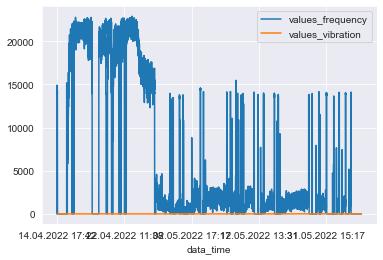

In [15]:
data.plot(kind='line')

In [16]:
# Создадим дерево решений и обучим его с одним классификатором
clf_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10) # Дерево решений
X = data[['values_frequency', 'values_vibration']] # данные для обучения
#y = data[['values_state_frequency', 'values_state_vibration']] # Данные ответ
y = data[['values_state_frequency', 'values_state_vibration']] # Данные ответ

In [17]:
clf_test.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

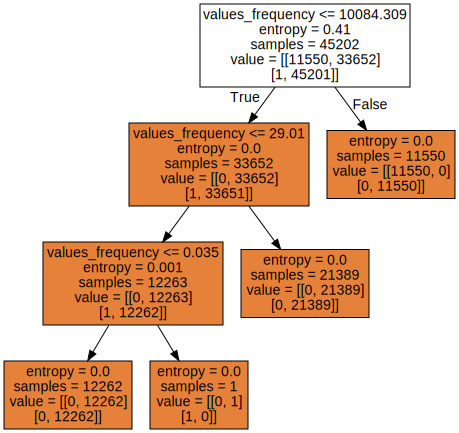

In [18]:
graph = Source(tree.export_graphviz(clf_test, out_file=None
                                    , feature_names=list(X), class_names=['норма', 'аварийно высокое']
                                    , filled=True))
display(SVG(graph.pipe(format='svg')))   # Переобученная модель

In [19]:
clf_test.predict([[14259, 7]])

/Users/nikolaibabuhin/PycharmProjects/sirius_data/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([['аварийно высокое', 'норма']], dtype=object)